In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
file_path = "MallCustomers.csv"
df = pd.read_csv(file_path)

In [3]:
# Selecting relevant features ('Annual Income (k$)' and 'Spending Score (1-100)')
X = df.iloc[:, [3, 4]].values

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

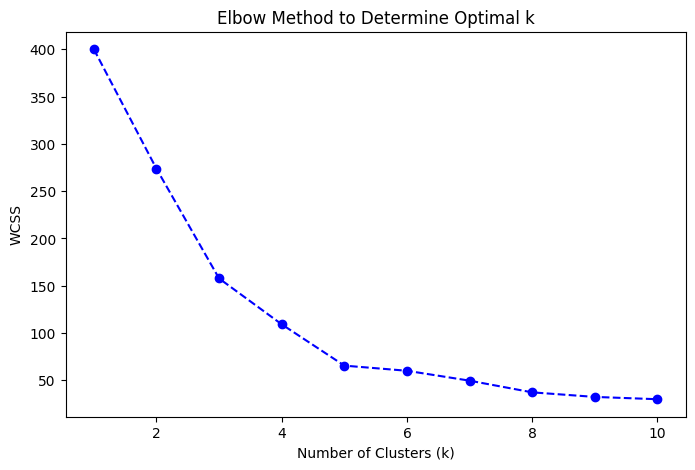

In [6]:
# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [7]:
# Applying K-Means with optimal k (assuming k=5 from the elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

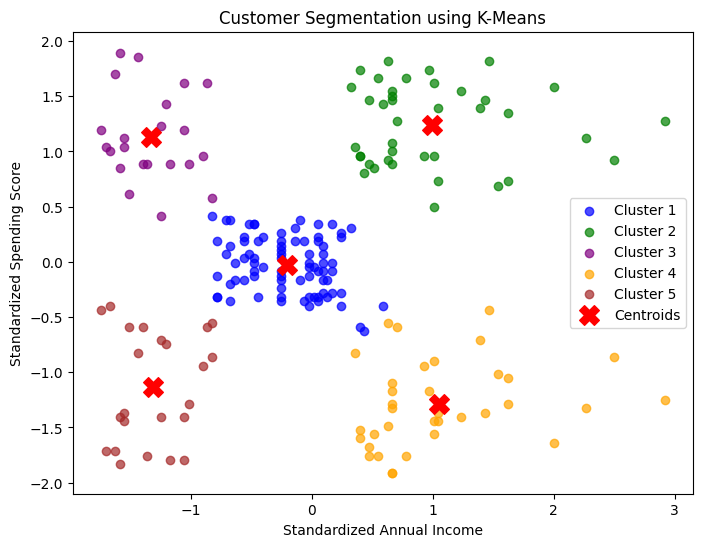

In [9]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'purple', 'orange', 'brown']
for i in range(optimal_k):
    plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], 
                label=f'Cluster {i+1}', alpha=0.7, color=colors[i])
    # Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()